# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
from pandas import read_csv
df = read_csv('data.csv')
data = df.values

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];

Text(0, 0.5, 'Bénéfice x1000')

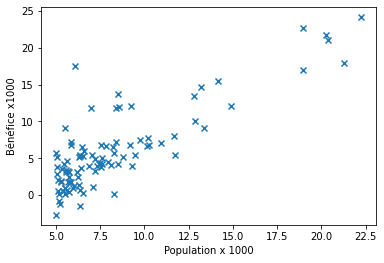

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

In [5]:
y = np.asmatrix(y).transpose()

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCostNonVect(X, y, theta):
    cost= 0
    for xi,yi in zip(X,y):
        h = 0
        for x,t in zip(xi,theta):
            h += x*t
        cost += (h - yi)**2
      
    return cost/(2*X.shape[0])
    

In [7]:
def computeCost(X, y, theta):
    
    h = X.dot(theta)
    
    c = np.square(h-y)
    
    
    s = np.sum(c)
    cost = s/(2*X.shape[0])
    
    return cost
     # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement

  
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [8]:
def gradientDescent2(X, y, theta, alpha, iterations,theta_costs):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    m = X.shape[0]
    for i in range(iterations):
        h = X.dot(theta)
        x = np.transpose(X)
        gradient = x.dot(h - y)

        theta = theta - alpha*gradient/m

        cost = computeCost(X, y, theta)
        t = np.asarray(theta.flatten())
        t=np.append(t,cost)

        theta_costs.append(t)

    return theta

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    m = X.shape[0]
    for i in range(iterations):
        h = X.dot(theta)
        x = np.transpose(X)
        gradient = x.dot(h - y)

        theta = theta - alpha*gradient/m
      

    return theta

In [10]:
def normalEquation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [11]:
theta = np.zeros((2, 1))
theta_costs = []

Calculer le cout initial

In [12]:
initialCost=computeCost(X, y, theta)


In [13]:
import time
start_time = time.process_time()
initialCost=computeCost(X, y, theta)
timeV = time.process_time() - start_time
print("initialCost avec vectorisation = {}".format(timeV))

initialCost avec vectorisation = 0.0


In [14]:
start_time = time.process_time()
initialCost=computeCostNonVect(X, y, theta)
timeNV = time.process_time() - start_time
print("initialCost sans vectorisation = {}".format(timeV))

initialCost sans vectorisation = 0.0


In [15]:
print("temps d'éxecution de cost fonction avec vectorisation = {}".format(timeV))
print("temps d'éxecution de cost fonction sans vectorisation = {}".format(timeNV))

temps d'éxecution de cost fonction avec vectorisation = 0.0
temps d'éxecution de cost fonction sans vectorisation = 0.015625


**le calcul avec Vectorisation est tres rapide que sans vectorisation**

In [16]:
timeV < timeNV

True

In [17]:
t = np.asarray(theta.flatten())
t=np.append(t,initialCost)


theta_costs.append(t)


In [18]:
print(theta.shape)
theta_costs

(2, 1)


[array([ 0.        ,  0.        , 32.07273388])]

Appel des fonctions de calcul du gradient

In [19]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta = gradientDescent2(X, y, theta, alpha, iterations,theta_costs);
print(theta)
print(theta_costs)

[[-3.63029144]
 [ 1.16636235]]
[array([ 0.        ,  0.        , 32.07273388]), array([0.05839135, 0.6532885 , 6.73719046]), array([0.06289175, 0.77000978, 5.93159357]), array([0.05782293, 0.79134812, 5.90115471]), array([0.05106363, 0.79572981, 5.89522859]), array([0.04401438, 0.79709618, 5.89009494]), array([0.03692413, 0.79792547, 5.88500416]), array([0.02983712, 0.79865824, 5.87993248]), array([0.02276118, 0.79937279, 5.87487909]), array([0.0156977 , 0.80008305, 5.86984391]), array([0.0086469 , 0.8007915 , 5.86482687]), array([1.60879310e-03, 8.01498573e-01, 5.85982789e+00]), array([-5.41662487e-03,  8.02204356e-01,  5.85484692e+00]), array([-0.01242938,  0.80290886,  5.84988389]), array([-0.01942949,  0.8036121 ,  5.84493874]), array([-0.02641699,  0.80431407,  5.8400114 ]), array([-0.03339189,  0.80501478,  5.83510181]), array([-0.04035421,  0.80571422,  5.8302099 ]), array([-0.04730399,  0.8064124 ,  5.82533562]), array([-0.05424124,  0.80710932,  5.82047889]), array([-0.0611659

Traçage de la fonction du coût

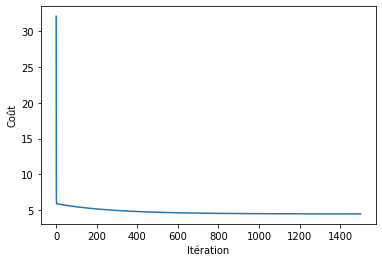

The optimal cost is : 4.483388256587726


In [20]:
x = [i for i in range(iterations+1)]

theta_costs = np.asmatrix(theta_costs)
costs = theta_costs[:,2]
fig, ax = plt.subplots()
ax.plot(x, costs)
plt.xlabel('Itération')
plt.ylabel('Coût')
plt.show()
print("The optimal cost is : {}".format(costs.item(-1)))

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

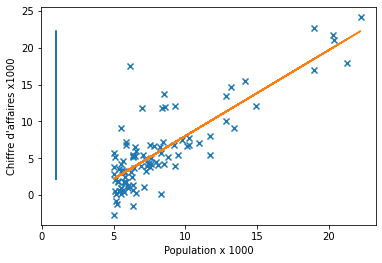

In [21]:

y_pred=np.matmul(X,theta)
y = data[:,1]
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


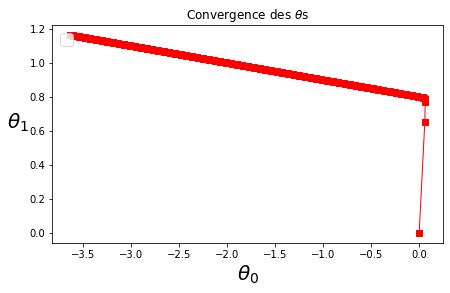

In [22]:
theta_costs
plt.figure(figsize=(7,4))
plt.plot(theta_costs[:,0], theta_costs[:,1], "r-s", linewidth=1, )

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.title("Convergence des $\\theta$s");
plt.show()

In [23]:
import plotly.graph_objects as go
t0 = np.asarray(theta_costs[:,0])

theta=theta_costs[-1,:2]
t1 = np.asarray(theta_costs[:,1])
print(np.max(t1))
print(np.min(t1))
theta0_vals = np.linspace(-5,5,300)
theta1_vals = np.linspace(-5,5,300)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = computeCost(X, y, t.transpose())
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0
c = np.asarray(theta_costs[:,2])
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='cost fonction pour different thetas', autosize=True,
                  scene = dict(
                    xaxis_title="theta0",
                    yaxis_title="theta1",
                    zaxis_title='Cost'),
                  width=850, height=800
                 )
fig.show()

1.166362350335582
0.0


In [24]:
J_vals.shape

(300, 300)

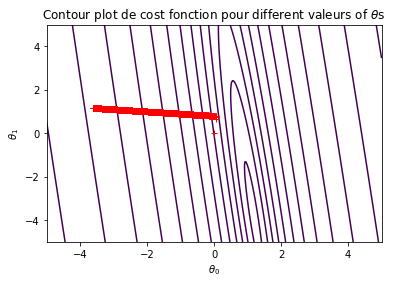

In [25]:

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(-10,10,100))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot de cost fonction pour different valeurs of $\\theta$s");
plt.plot(t0, t1, 'r+');

In [26]:
print(c[-1])

[4.48338826]


In [27]:
print(theta)

[[-3.63029144  1.16636235]]


In [28]:
print("meilleur theta par normal equation = ")
start_time = time.process_time()
meilleurTheta = normalEquation(X, y)
timeNormalEq = time.process_time() - start_time

print(meilleurTheta)

meilleur theta par normal equation = 
[-3.89578088  1.19303364]


In [29]:
computeCost(X,y,meilleurTheta)

4.476971375975179

**Les résultats des deux méthodes gradient descent et l'équation normale sont quasiment pareil**

In [30]:
# paramètres
theta = np.zeros((2,1))
iterations = 1500;
alpha = 0.01;
# Appel
y = np.asmatrix(y).transpose()
start_time = time.process_time()
theta = gradientDescent(X, y, theta, alpha, iterations);
timeGD = time.process_time() - start_time
print("temps d'execution pour le GD {}".format(timeGD))
print("temps d'execution pour normal equation {}".format(timeNormalEq))

temps d'execution pour le GD 0.09375
temps d'execution pour normal equation 0.0


**Dans ce cas où le nombre des features et des données est tres petit, normal equation est plus performant que le GD mais dans d'autres cas où le nombre de features et données est assez grand,l'utilisation de l'equation normale sera tres couteuse**

In [31]:
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Prédire des valeurs de y

In [32]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

matrix([[0.45197679]])

In [33]:
predict2 = np.matmul([1, 7],theta);
predict2

matrix([[4.53424501]])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [34]:
# données
df = read_csv('dataMulti.csv')
dataMulti = df.values

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [35]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X2=dataMulti[:,:2]
y2 = dataMulti[:, 2]

Mise à l'échelle des données

(47,)
329900.0
(47,)
(47, 1)


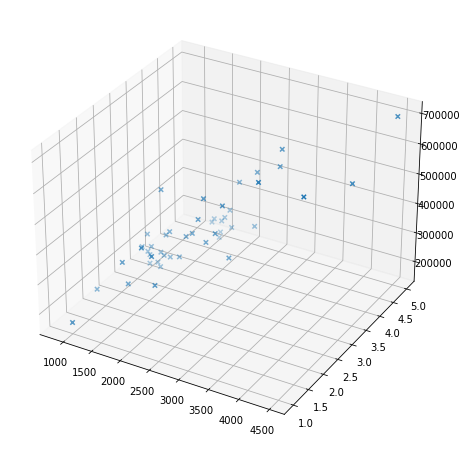

In [36]:
# y_pred2=np.asarray(np.matmul(X2,theta2))
# print(y_pred2.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

x1= X2[:,0]
x2 = X2[:,1]
print(x2.shape)
y2 = dataMulti[:,2];
print(y2[1])
print(y2.shape)
print(X2[:,1:].shape)
ax.scatter(x1,x2,y2,marker ='x')
# ax.plot(x1.flatten(),x2.flatten(),y_pred2.flatten())


In [37]:
X2.shape

(47, 2)

In [38]:
y2.shape

(47,)

In [39]:
y2 = np.asmatrix(y2).transpose()

In [40]:
y2.shape

(47, 1)

## **Sans Normalisation**

In [41]:
XN2 = np.column_stack((intercept,X2))

In [42]:
theta_costs2 = []
theta2 = np.zeros((3, 1))
initialCost2=computeCost(XN2, y2, theta2)


In [43]:
initialCost2

65591585744.680855

In [44]:
t2 = np.asarray(theta2.flatten())
t2=np.append(t2,initialCost2)


theta_costs2.append(t2)

In [45]:
iterations = 1500;
alpha = 0.00000001;
# Appel
theta2 = gradientDescent2(XN2, y2, theta2, alpha, iterations,theta_costs2);

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [46]:
import time
theta2 = np.zeros((3,1))
iterations = 1500;
alpha = 0.000000001;
# Appel
start_time = time.process_time()
theta2 = gradientDescent(XN2, y2, theta2, alpha, iterations);
timeN = time.process_time() - start_time

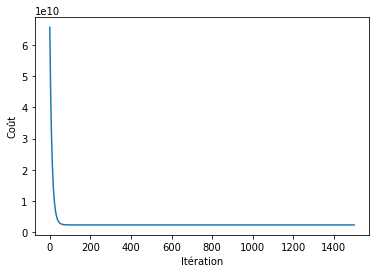

theta = 
[[8.58372035e-02]
 [1.65223889e+02]
 [2.63532650e-01]]
cost = 
[[2.39785636e+09]]


In [47]:
x = [i for i in range(iterations+1)]

theta_costs2 = np.asmatrix(theta_costs2)
costs2 = theta_costs2[:,3]
fig, ax = plt.subplots()
ax.plot(x, costs2)
plt.xlabel('Itération')
plt.ylabel('Coût')
plt.show()
print("theta = ")
print(theta2)
print("cost = ")
print(costs2[-1])

In [48]:
print("meilleur theta par normal equation = ")
meilleurTheta = normalEquation(XN2, y2)
print(meilleurTheta)

meilleur theta par normal equation = 
[[89597.765961  ]
 [  139.21063465]
 [-8737.91542019]]


In [49]:
computeCost(XN2,y2,meilleurTheta)

2043280477.3925707

**##ils sont proches nos résulats avec le GD et les résultats de normal equation**

# **Avec Normalisation**

Normalisation des données en moyenne = 0

In [50]:
def normalize(X):
    moy = X.mean(axis=0)
    print(moy)
    std = X.std(axis=0)
    print(std)
    return (X-moy)/std

In [51]:
X2=dataMulti[:,:2]

In [52]:
X2 = np.column_stack((intercept,normalize(X2)))

[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]


In [53]:
X2[1]

array([ 1.        , -0.5096407 , -0.22609337])

Appliquer la descente du gradient à plusieurs variables

In [54]:
theta_costs2 = []
theta2 = np.zeros((3, 1))
initialCost2=computeCost(X2, y2, theta2)


In [55]:
initialCost2

65591585744.680855

In [56]:
t2 = np.asarray(theta2.flatten())
t2=np.append(t2,initialCost2)


theta_costs2.append(t2)

In [57]:
iterations = 1500;
alpha = 0.01;
# Appel
theta2 = gradientDescent2(X2, y2, theta2, alpha, iterations,theta_costs2);

# **Comparer la descente du gradient avec et sans normalisation**
- **Exemple**: voir la difference dans le temps de calcul

In [58]:

theta2 = np.zeros((3,1))
iterations = 1500;
alpha = 0.01;
# Appel
start_time = time.process_time()
theta2 = gradientDescent(X2, y2, theta2, alpha, iterations);
timeNormal = time.process_time() - start_time


In [59]:
print("temps d'execution avec normalisation {}".format(timeNormal))
print("temps d'execution sans normalisation {}".format(timeN))

temps d'execution avec normalisation 0.046875
temps d'execution sans normalisation 0.078125


**Presque meme temps d'execution mais pas le meme résultat, sans normalisation GD nécessite plus d'itérations donc plus de temps pour avoir un résultat comme GD avec normalisation**

**concernat le GD sur des données non normalisées il faut un taux d'apprentissage très petit pour qu'il puisse converger.**
**Étant donné que x2 (nbChambre) est plus petit que x1 (superficie), il faut un changement hyper important de theta2 pour affecter la fonction de coût. Pour faire même un petit changement dans la valeur de theta2, la descente de gradient doit parcourir une distance verticalement beaucoup plus longue, c'est-à-dire la direction de x2 dans ce cas.**
**Sans normaliser les données, la descente de gradient nécessitera un taux d'apprentissage beaucoup plus faible, ce qui signifie des étapes plus petites pour pouvoir converger.**

️**Direction étendue ➡ Pente plus petite ➡ Plus de pas nécessaires pour atteindre les minima**

**Le plus de nombre des caractéristiques, le plus de temps pour converger vers un minimum.**

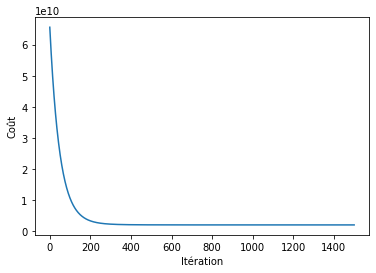

theta = 
[[340412.66939734]
 [109370.02582704]
 [ -6500.53710423]]
cost = 
[[2.04328314e+09]]


In [60]:
x = [i for i in range(iterations+1)]

theta_costs2 = np.asmatrix(theta_costs2)
costs2 = theta_costs2[:,3]
fig, ax = plt.subplots()
ax.plot(x, costs2)
plt.xlabel('Itération')
plt.ylabel('Coût')
plt.show()
print("theta = ")
print(theta2)
print("cost = ")
print(costs2[-1])

In [61]:
print("meilleur theta par normal equation = ")
meilleurTheta = normalEquation(X2, y2)
print(meilleurTheta)

meilleur theta par normal equation = 
[[340412.76595745]
 [109447.76551898]
 [ -6578.27679028]]


In [62]:
computeCost(X2,y2,meilleurTheta)

2043280477.3925703

**ils sont presque égaux nos résulats avec le GD et les résultats de normal equation**

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [63]:
y2 = dataMulti[:,2]


In [64]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3) 
XSGD = np.delete(X2,0,1)

sgd_reg.fit(XSGD,y2) 

SGDRegressor()

In [65]:

theta3 = sgd_reg.coef_
print(theta3)
theta3 = np.insert(theta3, 0, sgd_reg.intercept_)
print(theta3)


[108878.06261081  -5991.96038419]
[340410.21916907 108878.06261081  -5991.96038419]


In [66]:
theta3 = np.asmatrix(theta3).transpose()

In [67]:
theta3.shape

(3, 1)

In [68]:
y2 = np.asmatrix(y2).transpose()

In [69]:
X2.shape

(47, 3)

In [70]:
print("cost fonction de SGDRegressor = {}".format(computeCost(X2,y2,theta3)))

cost fonction de SGDRegressor = 2043427601.1055307


In [71]:
print("cost fonction de normalized = GD {}  ".format(costs2[-1]))

cost fonction de normalized = GD [[2.04328314e+09]]  


**les résultats obtenus par le GD et le SGDRegressor sont presque les memes**

In [72]:
from sklearn.metrics import mean_squared_error
y_pred2=np.matmul(X2,theta2)
print("cost fonction avec sklearn = {}".format(mean_squared_error(np.array(y2), np.array(y_pred2))))

cost fonction avec sklearn = 4086566273.435001


**C'est le meme résultat qu'on a obtenu avec computeCost mais il'y a une différence dans l'equation utilisé, sklearn ne divise pas sur 2.**
 **donc mean_squared_error = 2*computeCost()**

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [73]:
# bonne chance